In [5]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

Using TensorFlow backend.
/Users/ric7/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [6]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


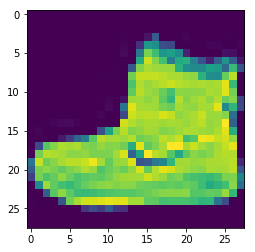

In [7]:
plt.imshow(X_train[0].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5787

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [13]:
pca = PCA(n_components=3)

Классифицируем данные с помощью лог. регрессии для каждого из значений из списка заданных параметров. Результаты запишем в массив.

In [25]:
components_options = [3, 5, 7, 12, 18, 25, 33, 40, 48, 55]

results = []

for n_comps in components_options:
    pca = PCA(n_components=n_comps)
    used_indices = np.random.choice(
        np.arange(X_train.shape[0]), 10000, replace=False)
    X_train_reduced = pca.fit_transform(
        X_train[used_indices].reshape([-1, 784]))

    lr = LogisticRegression()
    lr.fit(X_train_reduced, y_train[used_indices])

    acc = accuracy_score(y_test, lr.predict(
        pca.transform(X_test.reshape([-1, 784]))))
    results.append(acc)
    
results = np.array(results)
components_options = np.array(components_options)

Настроим параметры для построения графиков

In [26]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'CMU Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

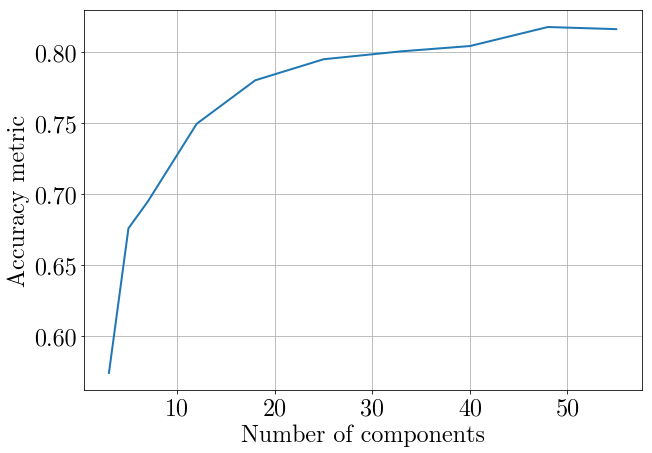

In [27]:
plt.figure(figsize=(10,7))
plt.plot(components_options, results)
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Accuracy metric")
plt.show()

Усложним вычисление: для каждого теста будем прогонять 10 экспериментов. 

In [30]:
results = []
variance_of_accuracy = []
n_tests = 10
for n_comps in components_options:
    scores = [] 
    for i in range(n_tests):
        pca = PCA(n_components=n_comps)
        used_indices = np.random.choice(
            np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_reduced = pca.fit_transform(
            X_train[used_indices].reshape([-1, 784]))
        lr.fit(X_train_reduced, y_train[used_indices])
        scores.append(accuracy_score(
            y_test, lr.predict(pca.transform(X_test.reshape([-1, 784])))))
    results.append(np.mean(scores))
    variance_of_accuracy.append(np.var(scores))

Используя новые данные построим график дисперсии

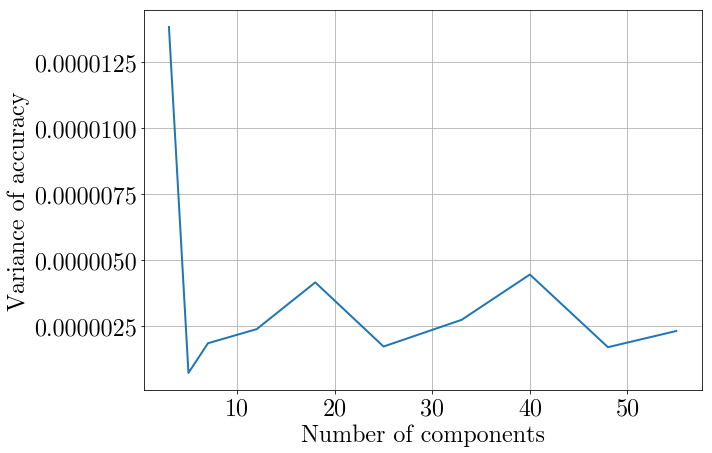

In [32]:
plt.figure(figsize=(10,7))
plt.plot(components_options, variance_of_accuracy)
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Variance of accuracy")
plt.show()

так как дисперсия достаточно низкая при большом количестве главных компонент, новый график точности не должен сильно отличаться от предыдущего (без усреднений)

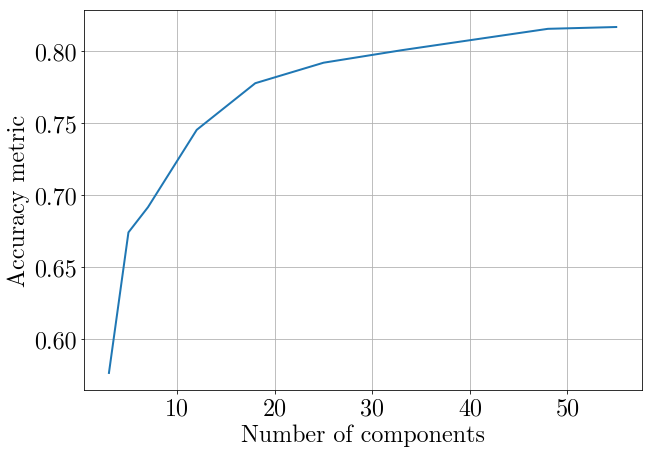

In [34]:
plt.figure(figsize=(10,7))
plt.plot(components_options, results)
plt.grid()
plt.xlabel("Number of components")
plt.ylabel("Accuracy metric")
plt.show()

так и есть.

Вывод: оптимальное количество главных компонент 35+